## ELHANCHIR Mohamed GLSID2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# reading the data from csv file 
dataset = pd.read_csv('Advertising.csv')
# showing the data 
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# separting data 
x = dataset[['TV', 'Radio', 'Newspaper']].values
y = dataset['Sales'].values


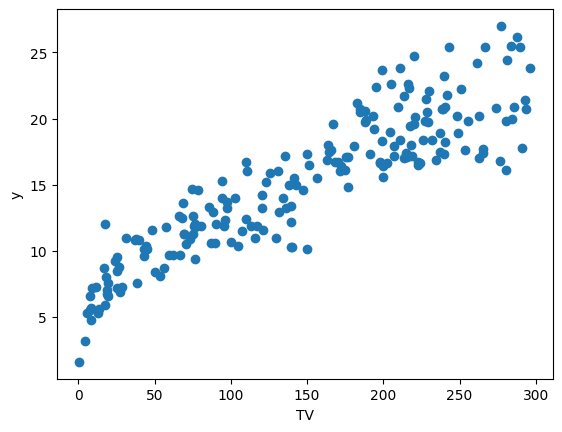

In [4]:
# affichage des sales en fonction de TV
plt.scatter(x[:,0], y)
plt.xlabel('TV')
plt.ylabel('y')
plt.show()

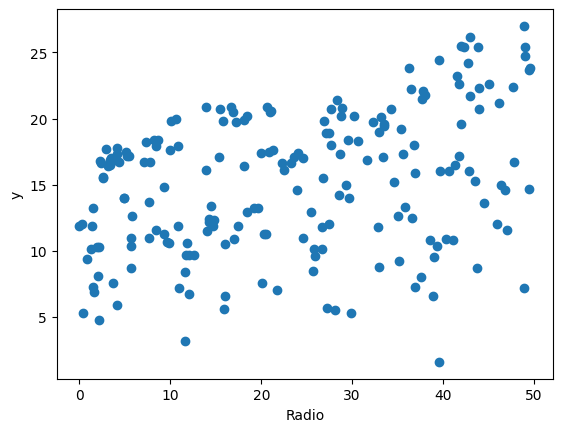

In [5]:
# affichage des sales en fonction de Radio 
plt.scatter(x[:,1], y)
plt.xlabel('Radio')
plt.ylabel('y')
plt.show()


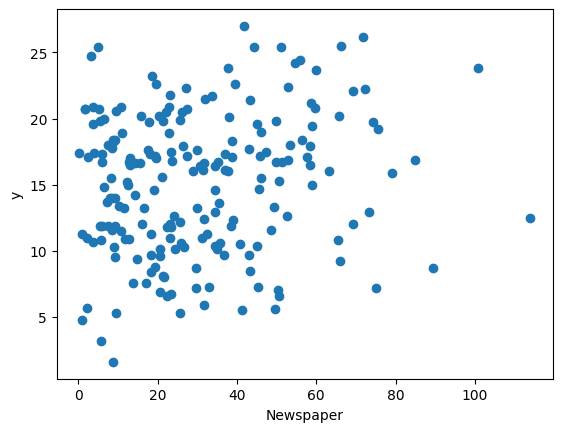

In [6]:
# affichage des sales en fonction de Newspaper
plt.scatter(x[:,2], y)
plt.xlabel('Newspaper')
plt.ylabel('y')
plt.show()

In [7]:
# verification des dimesions de x et y
print(x.shape)
print(y.shape)
#  redimensionnement de y
y = y.reshape(y.shape[0], 1)
print(y.shape)

(200, 3)
(200,)
(200, 1)


In [8]:
#  creation de la matrice 
X = np.hstack((x, np.ones((x.shape[0], 1))))
print(X.shape)
# affichage des 5 premiere valeur 
print(X[:5])



(200, 4)
[[230.1  37.8  69.2   1. ]
 [ 44.5  39.3  45.1   1. ]
 [ 17.2  45.9  69.3   1. ]
 [151.5  41.3  58.5   1. ]
 [180.8  10.8  58.4   1. ]]


In [9]:
#  initialization de theta avec 4 element 
theta = np.random.randn(4,1)
theta

array([[ 0.70617325],
       [-0.70250844],
       [-0.85600493],
       [ 1.6321795 ]])

In [10]:
# creation de model avec multiplication des valeur avec le vecteur theta
def model(X , theta):
    return np.dot(X, theta)

In [11]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [12]:
cost_function(X, y, theta)

2931.722655847328

In [13]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [14]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [15]:
n_iterations = 1000000
learning_rate = 0.00001

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [16]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

theta_final

array([[0.05633586],
       [0.11494087],
       [0.00453957],
       [3.93301107]])

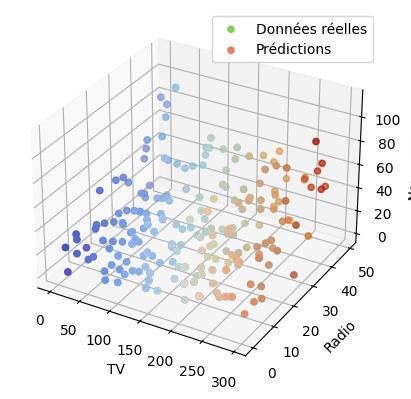

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracez les points pour les coordonnées TV, Radio et Newspaper
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, label='Données réelles')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=predictions, cmap='coolwarm',label='Prédictions')


# Affichez les noms des axes
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Newspaper')

# Affichez le graphique
plt.legend()
plt.show()

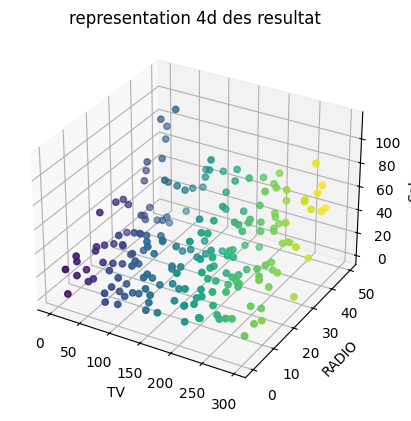

In [18]:
import mplcursors
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x[:,0], x[:,1], x[:,2], c=y)
ax.scatter(x[:,0], x[:,1], x[:,2], c=predictions)

ax.set_xlabel('TV')
ax.set_ylabel('RADIO')
ax.set_zlabel('Sales')
ax.set_title("representation 4d des resultat")

cursor = mplcursors.cursor(scatter, hover=True)

@cursor.connect("add")
def on_add(sel):
    sel.annotation.set_text(
        f'TV={x[sel.target.index, 0]:.2f}, RADIO={x[sel.target.index, 1]:.2f}, Sales={x[sel.target.index, 2]:.2f}'
    )

plt.show()

In [19]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=x[:,0],
    y=x[:,1],
    z=x[:,2],
    mode='markers',
    marker=dict(
        size=3,
        color=y,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

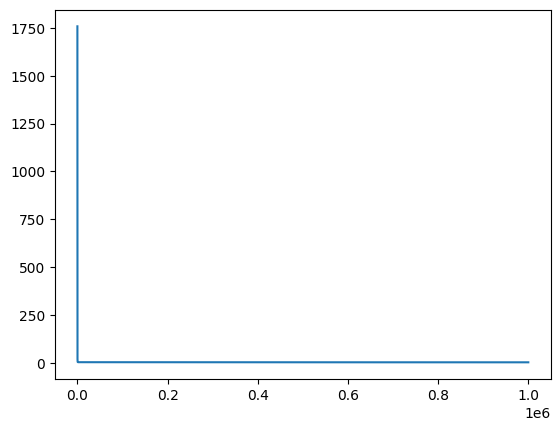

In [20]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [21]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [22]:
coef_determination(y, predictions)

0.9000736000701254